# EDA and Preprocessing

In [2]:
import numpy as np
import pandas as pd
import csv
from numpy import NaN
from numpy import array
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense
from keras import losses

## EDA
The original data of CIC-IDS-2017 is many PCAP files. We used the traffic feature extraction tool "CICFlowMeter" to generate some CSV files containing a large number of features and labels. There are five days of data, and we chose Wednesday, including normal traffic, DoS attacks and Heartbleed attacks [1] [2].

We read and observe the data first.

In [3]:
data=pd.read_csv("https://github.com/xiaozhang-github/DST-Assessment-4/raw/main/Data/Wednesday-workingHours.pcap_ISCX.zip")

In [4]:
data.shape

(692703, 79)

In [5]:
data.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058824,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,389,433,11,4,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,88,1088,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,80,579225,132,150,160,320799,160,0,1.212121,13.926212,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,49666,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,49413,4,3,0,18,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,692703.000000,6.927030e+05,692703.000000,692703.000000,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,...,692703.000000,692703.000000,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05
mean,5686.869462,2.800168e+07,9.556261,10.214079,5.550930e+02,1.699644e+04,233.593936,15.022183,60.555440,82.895863,...,6.121279,26.761141,9.224478e+04,4.760852e+04,1.627363e+05,6.315186e+04,2.211122e+07,4.743744e+05,2.252174e+07,2.173373e+07
std,15727.423560,4.276680e+07,747.197814,984.204633,6.163663e+03,2.241175e+06,603.751856,51.068835,157.643794,226.126084,...,715.155068,6.322368,7.007049e+05,4.742081e+05,1.094616e+06,6.051023e+05,3.812415e+07,4.488512e+06,3.848292e+07,3.807725e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,2.010000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,6.143700e+04,2.000000,2.000000,8.200000e+01,1.880000e+02,46.000000,0.000000,41.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.302437e+07,7.000000,6.000000,3.650000e+02,1.159500e+04,341.000000,32.000000,56.666667,128.916917,...,2.000000,32.000000,9.910000e+02,0.000000e+00,9.910000e+02,9.880000e+02,1.590000e+07,0.000000e+00,1.650000e+07,1.000000e+07
max,65487.000000,1.200000e+08,203943.000000,272353.000000,1.224076e+06,6.270000e+08,24820.000000,2065.000000,4640.757576,6429.190773,...,197124.000000,60.000000,1.000000e+08,7.420000e+07,1.050000e+08,1.000000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


We can see that there are 692703 pieces of data, and the data has 78 features and 1 label.

In [7]:
pd.set_option('display.max_rows', 79)

In [8]:
print(data.dtypes)

 Destination Port                 int64
 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets       int64
 Total Length of Bwd Packets      int64
 Fwd Packet Length Max            int64
 Fwd Packet Length Min            int64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max             int64
 Bwd Packet Length Min            int64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                    float64
 Flow Packets/s                 float64
 Flow IAT Mean                  float64
 Flow IAT Std                   float64
 Flow IAT Max                     int64
 Flow IAT Min                     int64
Fwd IAT Total                     int64
 Fwd IAT Mean                   float64
 Fwd IAT Std                    float64
 Fwd IAT Max                      int64
 Fwd IAT Min                      int64


We can see that all the features are continuous variables, which are inseparable from the work of "CICFlowMeter", so there is no need to go through the steps of dealing with character variables。

In [9]:
count = data[' Label'].value_counts()
count

BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name:  Label, dtype: int64

In [10]:
percent = data[' Label'].value_counts()/data.shape[0]
percent

BENIGN              0.635238
DoS Hulk            0.333582
DoS GoldenEye       0.014859
DoS slowloris       0.008367
DoS Slowhttptest    0.007938
Heartbleed          0.000016
Name:  Label, dtype: float64

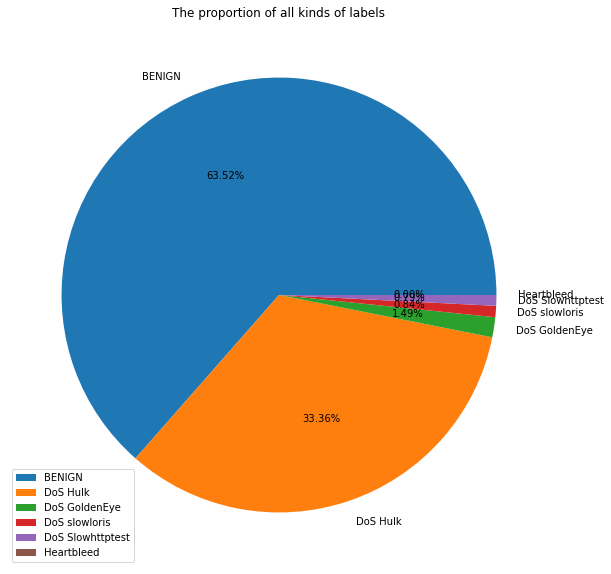

In [11]:
plt.figure(figsize=(10, 10))
plt.pie(count, labels=['BENIGN', 'DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest', 'Heartbleed'], autopct="%1.2f%%")
plt.legend()
plt.title("The proportion of all kinds of labels")
plt.show()

There are six types of labels, including benign traffic, four types of DoS attacks and Heartbleed attacks, mainly benign traffic and DoS Hulk. While the number of  Heartbleed attacks is very small. it is not the focus of our analysis this time. In other words, we will mainly focus on the classification, identification and prediction of DoS attacks.

## Preprocessing

We first convert the character labels to the corresponding number labels that we can carry into the neural network model.

In [12]:
cleanup = {' Label':{'BENIGN':0, 'DoS Hulk':1, 'DoS GoldenEye':2, 'DoS slowloris':3, 'DoS Slowhttptest':4, 'Heartbleed':5}}
data.replace(cleanup, inplace=True)

In [13]:
data[' Label'].value_counts()

0    440031
1    231073
2     10293
3      5796
4      5499
5        11
Name:  Label, dtype: int64

### Missing values and infinite values
Next we detect missing values。

In [14]:
print(np.isnan(data).any())

 Destination Port               False
 Flow Duration                  False
 Total Fwd Packets              False
 Total Backward Packets         False
Total Length of Fwd Packets     False
 Total Length of Bwd Packets    False
 Fwd Packet Length Max          False
 Fwd Packet Length Min          False
 Fwd Packet Length Mean         False
 Fwd Packet Length Std          False
Bwd Packet Length Max           False
 Bwd Packet Length Min          False
 Bwd Packet Length Mean         False
 Bwd Packet Length Std          False
Flow Bytes/s                     True
 Flow Packets/s                 False
 Flow IAT Mean                  False
 Flow IAT Std                   False
 Flow IAT Max                   False
 Flow IAT Min                   False
Fwd IAT Total                   False
 Fwd IAT Mean                   False
 Fwd IAT Std                    False
 Fwd IAT Max                    False
 Fwd IAT Min                    False
Bwd IAT Total                   False
 Bwd IAT Mea

Only the "Flow Bytes/s" feature has missing values, and we delete them.

In [15]:
data1=data.dropna(axis = 0)

In [16]:
data1.shape

(691695, 79)

So we're left with 691695 entries.

It is worth noting that there are infinite values in this dataset, which we have not encountered in previous data processing, but which will cause some subsequent commands to report errors.

In [17]:
print(np.isinf(data).any())

 Destination Port               False
 Flow Duration                  False
 Total Fwd Packets              False
 Total Backward Packets         False
Total Length of Fwd Packets     False
 Total Length of Bwd Packets    False
 Fwd Packet Length Max          False
 Fwd Packet Length Min          False
 Fwd Packet Length Mean         False
 Fwd Packet Length Std          False
Bwd Packet Length Max           False
 Bwd Packet Length Min          False
 Bwd Packet Length Mean         False
 Bwd Packet Length Std          False
Flow Bytes/s                     True
 Flow Packets/s                  True
 Flow IAT Mean                  False
 Flow IAT Std                   False
 Flow IAT Max                   False
 Flow IAT Min                   False
Fwd IAT Total                   False
 Fwd IAT Mean                   False
 Fwd IAT Std                    False
 Fwd IAT Max                    False
 Fwd IAT Min                    False
Bwd IAT Total                   False
 Bwd IAT Mea

In [18]:
ar_inf = np.where(np.isinf(data))
print(ar_inf)

(array([  1392,   1392,   2041, ..., 686814, 687994, 687994], dtype=int64), array([14, 15, 14, ..., 15, 14, 15], dtype=int64))


There are infinite values in the "Flow Bytes/s" and "Flow Packets/s" features, which we convert to missing values and delete.

In [19]:
data.replace(np.inf, np.nan, inplace=True)

In [20]:
data1=data.dropna(axis = 0)

In [21]:
data1.shape

(691406, 79)

We ended up with 691406 pieces of data.

### feature scaling

In [22]:
data2 = data1.drop([' Label'],axis=1)
data2.shape

(691406, 78)

The purposes of feature scaling are [3]

1. Make the features at the same numerical magnitude to reduce the influence of features with large variance and make the model more accurate.

2. Accelerate the convergence speed of the learning algorithm.

There are two commonly used methods,

1. Z-score Standardization，scale to mean 0, variance 1.

2. min-max Standardization，scale between 0 and 1.

In [23]:
data3 = preprocessing.MinMaxScaler().fit_transform(data2)

In [24]:
#mmax =np.max(data2, axis=0)
#mmin =np.min(data2, axis=0)
#for i in range(len(mmax)):
#    if mmax[i] == mmin[i]:
#        mmax[i] += 0.000001 #avoid getting devided by 0
#    data3= (data2- mmin) / (mmax - mmin)  

In [27]:
pd.DataFrame(data3).head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.001222,0.000319,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.000000,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005940,0.000004,0.000049,0.000018,0.000141,5.199362e-07,0.003183,0.000000,0.003369,0.004892,...,0.000020,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001344,0.000009,0.000044,0.000022,0.002573,5.023923e-06,0.063457,0.000000,0.067877,0.098389,...,0.000015,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005940,0.000127,0.000078,0.000044,0.002820,1.062201e-05,0.052901,0.000000,0.043756,0.066226,...,0.000051,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001344,0.000009,0.000039,0.000022,0.002573,5.027113e-06,0.063457,0.000000,0.075419,0.108024,...,0.000010,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After the min-max Standardization, we found that some of the data became very small because the original data range was so large, this method might not be applicable to this dataset.

In [28]:
data4 = preprocessing.StandardScaler().fit_transform(data2)

In [29]:
pd.DataFrame(data4).head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,-0.356380,-0.654735,-0.011460,-0.009372,-0.089171,-0.007588,-0.377384,-0.177020,-0.346490,-0.366976,...,-0.008567,-1.068350,-0.131771,-0.100491,-0.148812,-0.104465,-0.580707,-0.105787,-0.585977,-0.57149
1,-0.336726,-0.655620,0.001911,-0.005312,-0.062264,-0.007446,-0.256570,-0.294406,-0.285411,-0.228011,...,-0.002979,0.829301,-0.131771,-0.100491,-0.148812,-0.104465,-0.580707,-0.105787,-0.585977,-0.57149
2,-0.355871,-0.655605,0.000574,-0.004297,0.420442,-0.006187,2.219292,-0.294406,1.612049,2.428138,...,-0.004376,0.829301,-0.131771,-0.100491,-0.148812,-0.104465,-0.580707,-0.105787,-0.585977,-0.57149
3,-0.336726,-0.655275,0.009934,0.001794,0.469393,-0.004622,1.785685,-0.294406,0.902531,1.514421,...,0.005403,0.829301,-0.131771,-0.100491,-0.148812,-0.104465,-0.580707,-0.105787,-0.585977,-0.57149
4,-0.355871,-0.655605,-0.000763,-0.004297,0.420442,-0.006186,2.219292,-0.294406,1.833890,2.701870,...,-0.005773,0.829301,-0.131771,-0.100491,-0.148812,-0.104465,-0.580707,-0.105787,-0.585977,-0.57149


After the Z-score Standardization, the data looks very appropriate.

### Cross validation

In [30]:
y=data1[' Label']

In [31]:
train_x, test_x, train_y, test_y = train_test_split(data4, y, test_size=0.3, random_state=2021)

In [32]:
train_y.value_counts()/len(train_y)

0    0.636569
1    0.332211
2    0.014926
3    0.008420
4    0.007858
5    0.000017
Name:  Label, dtype: float64

In [33]:
test_y.value_counts()/len(test_y)

0    0.634426
1    0.334290
2    0.014796
3    0.008297
4    0.008177
5    0.000014
Name:  Label, dtype: float64

The distribution of different traffic in the training set and test set is basically the same, and we finally save them for all group members to use.

In [34]:
train = np.column_stack((train_x,train_y))
#np.savetxt('CICIDS2017_Wed_train.csv',train, delimiter = ',',fmt='%.6f')
test = np.column_stack((test_x, test_y))
#np.savetxt('CICIDS2017_Wed_test.csv', test, delimiter = ',',fmt='%.6f')

### Importance of scaling

In [35]:
y = data1[' Label']
x_original = data2
x_minmax = data3
x_standar = data4

In [37]:
model1 = Sequential()
model1.add(Dense(42, input_dim=78, activation='relu'))
model1.add(Dense(42, activation='relu'))
model1.add(Dense(6, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("No feature scaling")
model1.fit(x_original, y, epochs=5, batch_size=256)

No feature scaling
Epoch 1/5
691406/691406 [==============================] - 6s 8us/step - loss: 23350.0067 - accuracy: 0.9093
Epoch 2/5
691406/691406 [==============================] - 6s 8us/step - loss: 5161.0421 - accuracy: 0.9399
Epoch 3/5
691406/691406 [==============================] - 6s 8us/step - loss: 2456.5827 - accuracy: 0.9330
Epoch 4/5
691406/691406 [==============================] - 6s 8us/step - loss: 871.2389 - accuracy: 0.9076
Epoch 5/5
691406/691406 [==============================] - 6s 8us/step - loss: 513.7400 - accuracy: 0.9537


In [40]:
model2 = Sequential()
model2.add(Dense(42, input_dim=78, activation='relu'))
model2.add(Dense(42, activation='relu'))
model2.add(Dense(6, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("min-max Standardization")
model2.fit(x_minmax, y, epochs=5, batch_size=256)

min-max Standardization
Epoch 1/5
691406/691406 [==============================] - 5s 8us/step - loss: 0.1021 - accuracy: 0.9693
Epoch 2/5
691406/691406 [==============================] - 5s 8us/step - loss: 0.0326 - accuracy: 0.9878
Epoch 3/5
691406/691406 [==============================] - 5s 8us/step - loss: 0.0196 - accuracy: 0.9951
Epoch 4/5
691406/691406 [==============================] - 5s 8us/step - loss: 0.0152 - accuracy: 0.9963
Epoch 5/5
691406/691406 [==============================] - 5s 8us/step - loss: 0.0139 - accuracy: 0.9965


In [41]:
model3 = Sequential()
model3.add(Dense(42, input_dim=78, activation='relu'))
model3.add(Dense(42, activation='relu'))
model3.add(Dense(6, activation='softmax'))
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Z-score Standardization")
model3.fit(x_standar, y, epochs=5, batch_size=256)

Z-score Standardization
Epoch 1/5
691406/691406 [==============================] - 6s 8us/step - loss: 0.0631 - accuracy: 0.9807
Epoch 2/5
691406/691406 [==============================] - 5s 8us/step - loss: 0.0264 - accuracy: 0.9907
Epoch 3/5
691406/691406 [==============================] - 6s 8us/step - loss: 0.0236 - accuracy: 0.9914
Epoch 4/5
691406/691406 [==============================] - 5s 8us/step - loss: 0.0217 - accuracy: 0.9922
Epoch 5/5
691406/691406 [==============================] - 6s 8us/step - loss: 0.0206 - accuracy: 0.9927


It can be seen that after feature scaling, the running time of the model becomes shorter, indicating that the convergence speed is accelerated，and the accuracy is also improved.

## References

[1] [data](https://www.unb.ca/cic/datasets/ids-2017.html)

[2] [Deep learning methods in network intrusion detection: A survey and an
objective comparison](https://scholar.google.co.uk/scholar?q=deep+learning+methods+in+network+intrusion+detection+a+survey+and+an+objective+comparison&hl=zh-CN&as_sdt=0&as_vis=1&oi=scholart)

[3] [sklearn preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)